In [41]:
import tensorflow as tf
import keras
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import img_to_array

shared_dir = '/Users/prateek/Desktop/ML/Major/'
infected_dir = shared_dir + 'True_parasitized/'
uninfected_dir = shared_dir + 'True_uninfected/'
input_shape = [32, 32]
batch = 32

parasitized_data = os.listdir(infected_dir)
uninfected_data = os.listdir(uninfected_dir)

data = []
labels = []

for img in parasitized_data:
    try:
        img_read = plt.imread(infected_dir + img)
        img_resize = cv2.resize(img_read, input_shape)
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except :
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread(uninfected_dir + img)
        img_resize = cv2.resize(img_read, input_shape)
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

input_shape.append(3)
image_data = np.array(data)
labels = np.array(labels)

print("image_shape:", input_shape)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_shape: [32, 32, 3]
image_data: 26160
labels: 26160


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.1,random_state = 0)

y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 23544
X_test: 2617
y_train: 23544
y_test: 2617


In [ ]:
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras import Sequential,backend

In [ ]:

dropout_rate = 0.1

if backend.image_data_format() == 'channels_first':
    input_shape = input_shape.reverse
print(input_shape)

model = Sequential()
model.add(Conv2D(4, (4, 4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout_rate))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(dropout_rate, name='feature_extractor'))
model.add(Dense(2, activation='softmax'))
model.summary()


[32, 32, 3]
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 29, 29, 4)         196       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 8)         520       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 8)          0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 5, 5, 8)           0         
                                                                 
 flatten_8 (Flatten)         (None, 200)  

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
epochs = 300

accuracy_metrics = ['accuracy', 'binary_accuracy']
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=accuracy_metrics)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/300


2022-04-26 22:18:55.625792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


663/663 [==============================] - ETA: 0s - loss: 0.6850 - accuracy: 0.5649 - binary_accuracy: 0.5649

2022-04-26 22:19:02.711566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


663/663 [==============================] - 9s 11ms/step - loss: 0.6850 - accuracy: 0.5649 - binary_accuracy: 0.5649 - val_loss: 0.6682 - val_accuracy: 0.6059 - val_binary_accuracy: 0.6059
Epoch 2/300
663/663 [==============================] - 7s 11ms/step - loss: 0.6450 - accuracy: 0.6352 - binary_accuracy: 0.6352 - val_loss: 0.6050 - val_accuracy: 0.6913 - val_binary_accuracy: 0.6913
Epoch 3/300
663/663 [==============================] - 7s 10ms/step - loss: 0.6170 - accuracy: 0.6658 - binary_accuracy: 0.6658 - val_loss: 0.5923 - val_accuracy: 0.6968 - val_binary_accuracy: 0.6968
Epoch 4/300
663/663 [==============================] - 7s 10ms/step - loss: 0.5995 - accuracy: 0.6891 - binary_accuracy: 0.6891 - val_loss: 0.5709 - val_accuracy: 0.7079 - val_binary_accuracy: 0.7079
Epoch 5/300
663/663 [==============================] - 7s 10ms/step - loss: 0.5807 - accuracy: 0.7080 - binary_accuracy: 0.7080 - val_loss: 0.5587 - val_accuracy: 0.7304 - val_binary_accuracy: 0.7304
Epoch 6/300


dict_keys(['loss', 'accuracy', 'binary_accuracy', 'val_loss', 'val_accuracy', 'val_binary_accuracy'])


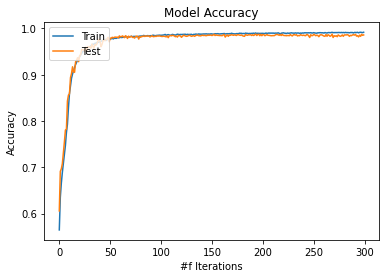

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'binary_accuracy', 'val_loss', 'val_accuracy', 'val_binary_accuracy'])


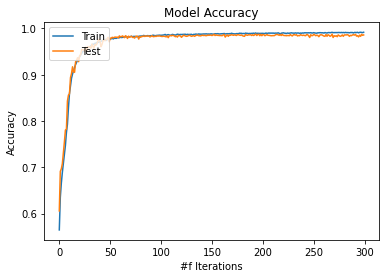

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import pandas as pd
from keras.models import Model

new_model=Model(inputs=model.input,outputs=model.get_layer('feature_extractor').output)
train_x=new_model.predict(X_train)
X_test=X_test.reshape(X_test.shape[0],32,32,3)
test_x=new_model.predict(X_test)
print(test_x.shape)

2022-04-26 23:03:28.501617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(2617, 64)


In [ ]:
train_y=[ np.where(r==1)[0][0] for r in y_train ]
print(len(train_y))

23544


In [ ]:
from sklearn.svm import SVC

svm=SVC(kernel='rbf')
svm.fit(train_x,train_y)
svm.score(train_x,train_y)
svm_predict=svm.predict(test_x)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(confusion_matrix( y_test[:,1], svm_predict ))
print(accuracy_score(y_test[:, 1], svm_predict))
print(precision_score( y_test[:,1], svm_predict, average='micro') )
print(recall_score( y_test[:,1], svm_predict, average='micro') )

[[1282   12]
 [  20 1303]]
0.9877722583110432
0.9877722583110432
0.9877722583110432


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier(n_neighbors = 5)
knc.fit(train_x,train_y)
knc.score(train_x,train_y)
knn_predict=knc.predict(test_x)


In [62]:
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier(n_neighbors = 5)
knc.fit(train_x,train_y)
knc.score(train_x,train_y)
knn_predict=knc.predict(test_x)

# 2 -> 0.9847153228888039
# 3 -> 0.9877722583110432
# 4 -> 0.9873901413832633
# 5 -> 0.9881543752388231
# 6 -> 0.9877722583110432
# 7 -> 0.9881543752388231
# 8 -> 0.9873901413832633
# 9 -> 0.988536492166603

In [63]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(confusion_matrix( y_test[:,1], knn_predict ))
print(accuracy_score(y_test[:, 1], knn_predict))
print( precision_score( y_test[:,1], knn_predict, average='micro') )
print( recall_score( y_test[:,1], knn_predict, average='micro') )

[[1282   12]
 [  19 1304]]
0.9881543752388231
0.9881543752388231
0.9881543752388231
